In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Lecture 1

In [91]:
df = pd.read_csv("Advertising.csv")

In [92]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [93]:
df["TV"] = scale(df.TV)
df["Radio"] = scale(df.Radio)
df["Newspaper"] = scale(df.Newspaper)
df["Sales"] = scale(df.Sales)

In [94]:
f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(df.TV, df.Sales)

In [95]:
# df.describe()

In [96]:
np_X_train = f_X_train.to_numpy()
np_y_train = f_y_train.to_numpy()
np_X_test = f_X_test.to_numpy()
np_y_test = f_y_test.to_numpy()

In [97]:
#add new dimension of size 1 --> shape (422,1) 
X_train = np_X_train[:,np.newaxis]
y_train = np_y_train[:,np.newaxis]
X_test = np_X_test[:,np.newaxis]
y_test = np_y_test[:,np.newaxis]

In [98]:
regr = linear_model.LinearRegression(fit_intercept = True)

regr.fit(X_train, y_train)

LinearRegression()

In [99]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Interecept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination / R2: %.2f" % r2_score(y_test, y_pred))




# R2 value of 47% = 47% of the variance can be explained by the model.
#Variance = measure of spread compared to mean
# is 47% a good metric?


Coefficients: 
 [[0.90484479]]
Interecept: 
 [0.00315968]
Mean squared error: 0.16
Root Mean squared error: 0.40
Coefficient of determination / R2: 0.80


C:\Users\Tanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


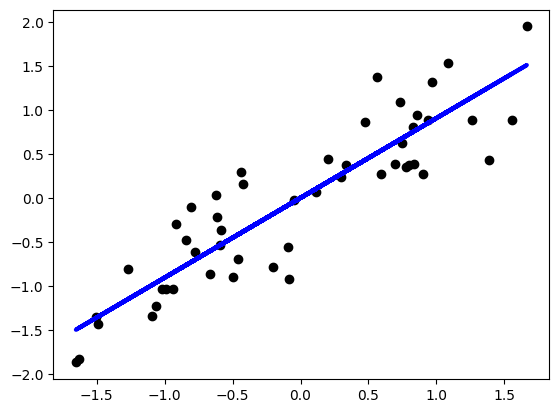

In [100]:
# Plot outputs
plt.scatter(X_test, y_test, color="black") #plot xy test set
plt.plot(X_test, y_pred, color="blue", linewidth=3) #plot Xtest and ypredicted

plt.xticks()
plt.yticks()

plt.show()

# Lecture 2

In [101]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR

In [102]:
regr = linear_model.LinearRegression(fit_intercept = True)
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [103]:
X = df[["TV","Radio","Newspaper"]].to_numpy()
y = df["Sales"].to_numpy()

In [104]:
train_size_abs, train_scores, test_scores = learning_curve(
    regr, X, y, train_sizes=[0.3, 0.6, 0.9]
)
for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

48 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.89
96 samples were used to train the model
The average train accuracy is 0.91
The average test accuracy is 0.89
144 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.90


# 

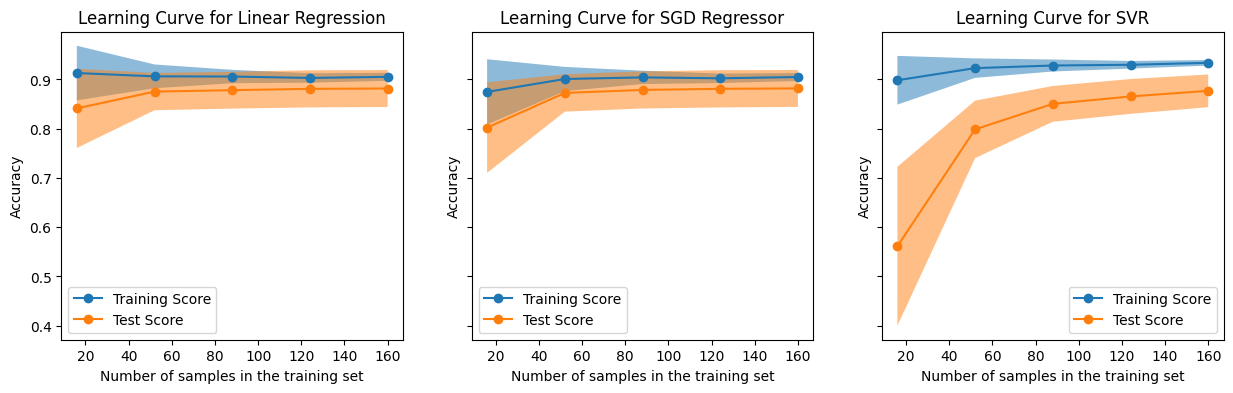

In [109]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

titles = ["Linear Regression", "SGD Regressor", "SVR"]
for ax_idx, estimator in enumerate([regr,sgd,svr]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {titles[ax_idx]}")